# EAA Winter School in Computational Acoustics 2018

## Finite-difference tutorial : 2D case

### Preamble

Firstly, standard modules such as `numpy` and `matplotlib` are loaded. Then some objects necessary to solve the above mentionned problem are imported in the current namespace.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from param import Param
from fdtd import FDTD
from analytical import GaussianPulseDR

### The Problem : The linear Euler Equation

We consider the 2 dimensional linear Euler equations (without sources) written in the conservative form as follows: 
$$
\frac{\partial U}{\partial t} + \frac{\partial E}{\partial x} + \frac{\partial F}{\partial z} = 0
\;,
$$
where $U = [p, \rho_0 v_x, \rho_0 v_z]^T$ are the convervative variables and where the fluxes $E$ and $F$ can be written:

$$
E =\left(
\begin{array}{cc}
\rho_0 c^2 v_x\\
p\\
0
\end{array}
\right) 
\;\;\text{and}\;\;
F =\left(
\begin{array}{cc}
\rho_0 c^2 v_z\\
0\\
p
\end{array}
\right).
$$


The initial condition is a Gaussian pulse written as follow:
$$
p(x, z, t=0) = P_0 + \epsilon \exp{\left(-ln(2) \frac{(x-x_S)^2 +(z-z_S)^2}{B_{wx}^2}\right)},
$$
where the couple of coordinates $(x_S, z_S)$ is the position of the source, $B_{wx}$ and $\epsilon$ are the width and the amplitude of the Gaussian pulse, respectively, and $P_0$ is the static pressure.

A periodic boundary condition is used for the x boundaries and no-slip boundary conditions for the z boundaries.
 
This problem is solved numerically using the FDTD technique and the solutions are compared to analytical waveforms obtained in a similar configuration.

### Custom parameters

Custom parameters can be used : 

```python
Param.PARAMETER = VALUE
```

The following parameters can be customized

* `nbx`, `nbz` : number of points following (x|z)-direction
* `dx`, `dz` : Spacial steps
* `CFL` : The CFL number
* `BWx` : Width of the Gaussian pulse
* `epsilon` : Amplitude of the Gaussian pulse
* `xS`, `zS` : absolute coordinates of the source (in meters)
* `xP`, `zP` : relative coordinates of the probe (indexes)
* `tend` : Compute until this time (in seconds)

### Numerical solution

The parameters of the simulation are set up using the `update_param` method of the `Param` object.
This method has to be called **after** your custom values (if you declared some)
The solver is initialized with the `FDTD` object that takes two arguments :

* The parameters `Param`
* The finite difference scheme you want to use. Available values are : `'3pts'`, `'5pts'`, `'7pts'`, and '`7pts_o`' for the DRP scheme of CKW. TAM.

Then, the simulation is launched using the `run` method of the object `FDTD`

In [33]:
# Here your customizations
Param.update_param()
fdtd = FDTD(Param, stencil='3pts')
rhou, rhov, pac = fdtd.run()

Start main loop
it:    0 | res:  6635.14 | time/it: 0.046 s.
it:   10 | res:  5021.27 | time/it: 0.028 s.
it:   20 | res:  3971.52 | time/it: 0.028 s.
it:   30 | res:  4339.55 | time/it: 0.027 s.
it:   40 | res:  4540.93 | time/it: 0.028 s.
it:   50 | res:  4608.97 | time/it: 0.029 s.
it:   60 | res:  4640.59 | time/it: 0.029 s.
it:   70 | res:  4658.43 | time/it: 0.027 s.
it:   80 | res:  4669.66 | time/it: 0.027 s.
it:   90 | res:  4679.38 | time/it: 0.027 s.
it:  100 | res:  4720.24 | time/it: 0.027 s.
it:  110 | res:  4925.89 | time/it: 0.027 s.
it:  120 | res:  5220.39 | time/it: 0.027 s.
it:  130 | res:  4981.23 | time/it: 0.027 s.
it:  140 | res:  4534.37 | time/it: 0.027 s.
it:  150 | res:  4584.85 | time/it: 0.029 s.
it:  160 | res:  4680.14 | time/it: 0.027 s.
it:  170 | res:  4703.88 | time/it: 0.027 s.
it:  180 | res:  4712.63 | time/it: 0.029 s.
it:  190 | res:  4717.26 | time/it: 0.030 s.
it:  200 | res:  4719.98 | time/it: 0.028 s.
End main loop 


### Analytical solution


In [34]:
Pt, _, _, _, wtime = GaussianPulseDR(Param.epsilon, Param.BWx, Param.c0,
                                     Param.z[int(Param.zP)], Param.zS)

### The results

<IPython.core.display.Javascript object>


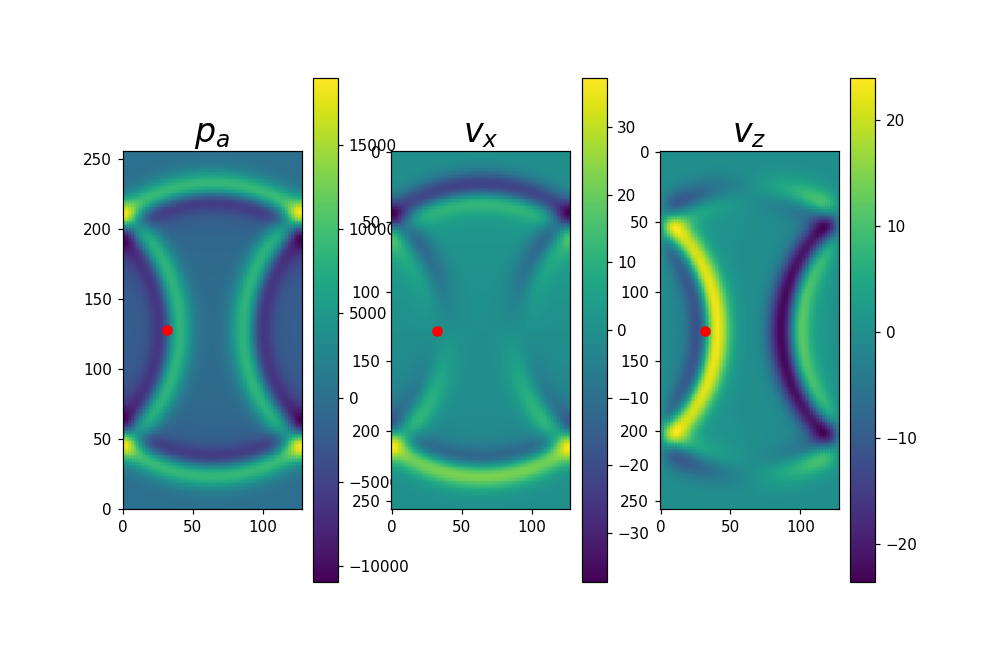

<IPython.core.display.Javascript object>


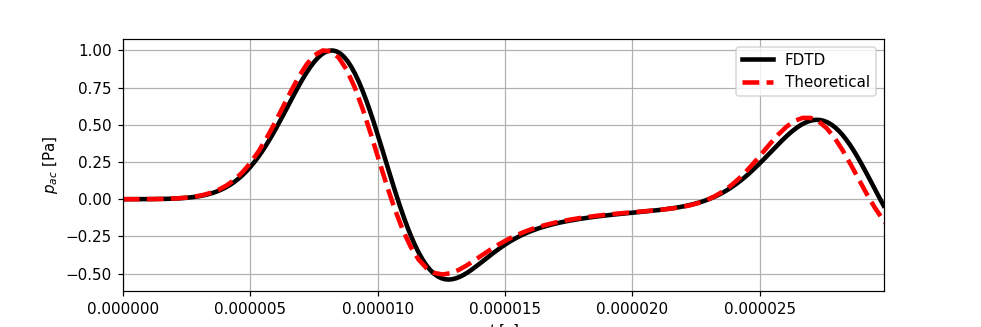

In [35]:
plt.figure('Acoustic variables', figsize=(9, 6))

plt.subplot(131)
plt.imshow(pac - Param.p0, interpolation='nearest')
plt.plot(Param.zP, Param.xP, 'ro')
plt.axis([0, Param.nbz, 0, Param.nbx])
plt.title(r'$p_a$', fontsize=22)
plt.colorbar()

plt.subplot(132)
plt.imshow(rhou/Param.rho0, interpolation='nearest')
plt.plot(Param.zP, Param.xP, 'ro')
plt.title(r'$v_x$', fontsize=22)
plt.colorbar()

plt.subplot(133)
plt.imshow(rhov/Param.rho0, interpolation='nearest')
plt.plot(Param.zP, Param.xP, 'ro')
plt.title(r'$v_z$', fontsize=22)
plt.colorbar()

plt.figure('Microphones', figsize=(9, 3))
plt.plot(fdtd.t, fdtd.probe/max(fdtd.probe), 'k', linewidth=3, label='FDTD')
plt.plot(wtime, Pt.real/Pt.real.max(), 'r--', linewidth=3, label='Theoretical')
plt.xlim([Param.t.min(), Param.t.max()])
plt.legend()
plt.grid()
plt.xlabel(r'$t$ [s]')
plt.ylabel(r'$p_{ac}$ [Pa]')

plt.show()

### Animation

You can animate the results as follow :

<IPython.core.display.Javascript object>


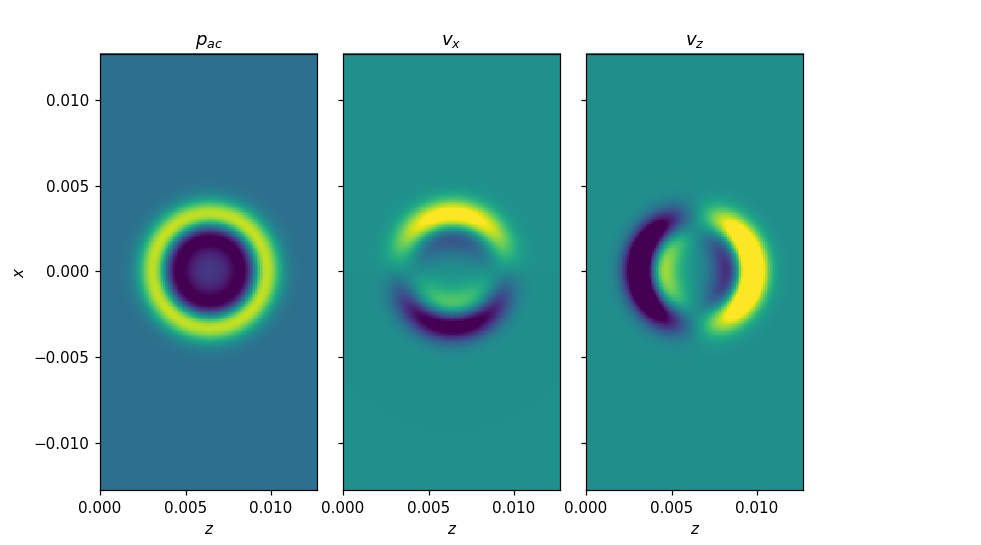

In [36]:
import matplotlib.animation as animation

path = 'results/'

def animate(i):
    data = np.load('{}it{}.npz'.format(path, i*Param.Nit_out))
    movie_p.set_data(data['p'] - Param.p0)
    movie_vx.set_data(data['vx'])
    movie_vz.set_data(data['vz'])


fig, ax = plt.subplots(1, 3, sharey=True, figsize=(9, 5))
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.82, top=0.9, wspace=0.1, hspace=0.1)
movie_p = ax[0].pcolorfast(Param.z, Param.x, pac - Param.p0)
ax[0].set_title(r'$p_{ac}$')
ax[0].set_ylabel(r'$x$')
movie_vx = ax[1].pcolorfast(Param.z, Param.x, rhou/Param.rho0)
ax[1].set_title(r'$v_{x}$')
movie_vz = ax[2].pcolorfast(Param.z, Param.x, rhov/Param.rho0)
ax[2].set_title(r'$v_{z}$')

for axe in ax:
    axe.set_aspect('equal')
    axe.set_xlabel(r'$z$')

ani = animation.FuncAnimation(fig, animate, interval=50, frames=int(Param.Nit/Param.Nit_out), blit=True, repeat=True)

## Play with the solver

* Change the finite difference scheme used in the simulation (`stencil` parameter) and observe the differences in terms of calculation time and accuracy of the results compared to the analytical solution.
* Adjust the width (`Param.BWx`) of the initial source to 2, 3, 4 or 5 times the spacial step and observe the results.
* Considering a 3 points finite difference scheme, play with the CFL number to see the stability of the FDTD simulation.
* *Optional:* Look at the `efluxes.py` file and create a new function (based on the `cinX` functions) that takes into account rigid boundaries at x = xmin and x = xmax. Do not forget to impose the right condition in the Runge Kutta function.